# 模型对比

- **ridge(alpha=0.01)**
    - **MSE = 0.016642**

- **esn_ridge_learner**
    - n_readout=464
    - n_components=30
    - damping = 0.61758485
    - weight_scaling = 0.94653868
    - **MSE = 0.016483**
    
- **ngboost**
    - **base=ridge(alpha=0.01)**
    - n_estimators=500
    - learning_rate=0.01
    - **MSE = 0.012642**

- **ngboost**
    - **base=esn_ridge_learner**
    - n_estimators=500
    - learning_rate=0.01
    - **MSE = 0.013037**

In [1]:
import sys
sys.path.append('/Users/apple/Documents/ML_Project/ML - 2.1/module')
from utils import *
from ngboost.learners import *
from sklearn.metrics import mean_squared_error
import numpy as np
from tqdm.notebook import tqdm as tqdm
%config InlineBackend.figure_format='retina'

X_train, X_test, Y_train, Y_test = get_data(hour_num=0, transform='sin+cos',
                                            test_index=[14389, 15389],
                                            drop_time=True, scale=True)

get_data(hour_num=0, transform='sin+cos', drop_time=True, scale=True)

Input space:  Index(['wind_speed', 'sin(wd)', 'cos(wd)'], dtype='object') 



/Users/apple/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## ridge(0.01)

In [35]:
from sklearn.linear_model import Ridge

mse_list = []
for i in tqdm(range(100)):
    Y_pred = Ridge(alpha=0.01).fit(X_train, Y_train).predict(X_test)
    mse = mean_squared_error(Y_pred, Y_test)
    mse_list.append(mse)

print('Test MSE:', np.mean(mse_list)) # 0.01664264688521998


Test MSE: 0.01664264688521998


## esn_ridge_learner

In [31]:
n_readout=464
n_components=30
damping = 0.61758485
weight_scaling = 0.94653868

mse_list = []
for i in tqdm(range(100)):
    esn = esn_ridge_learner(
                n_readout=n_readout,
                n_components=n_components,
                damping = damping,
                weight_scaling = weight_scaling,
                alpha=0.01).fit(X_train, Y_train)
    Y_pred = esn.predict(X_test)
    mse = mean_squared_error(Y_pred, Y_test)
    mse_list.append(mse)

print('Test MSE:', np.mean(mse_list)) # 0.0164576028774735


Test MSE: 0.016483014379162688


## ngboost( base=ridge(0.01) )

NGBRegressor(Base=Ridge(alpha=0.01, copy_X=True, fit_intercept=True,
                        max_iter=None, normalize=False, random_state=None,
                        solver='auto', tol=0.001),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 100] loss=-0.2827 val_loss=0.0000 scale=0.1250 norm=0.0631
[iter 200] loss=-0.3047 val_loss=0.0000 scale=0.0312 norm=0.0159
[iter 300] loss=-0.3060 val_loss=0.0000 scale=0.0078 norm=0.0040
[iter 400] loss=-0.3061 val_loss=0.0000 scale=0.0020 norm=0.0010

Test MSE 0.012642656209642687
Test NLL -0.4731345092118707


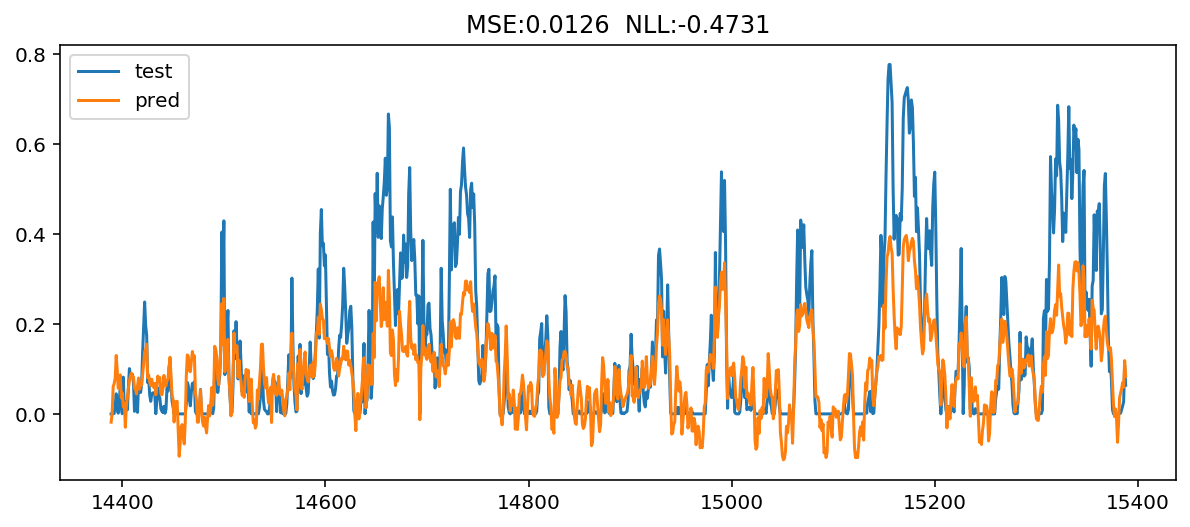

In [36]:
model_test(Base=default_linear_learner(alpha=0.01),
            n_estimators=500, verbose_eval=100,
            X_train=X_train, X_test=X_test,
            Y_train=Y_train, Y_test=Y_test,
            return_mse=True) # 0.012644396357596153

## ngboost( base=esn_ridge_learner )

NGBRegressor(Base=<ngboost.esn_learners.ESN_Ridge_learner object at 0x1a2133e8d0>,
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 100] loss=-0.2860 val_loss=0.0000 scale=0.1250 norm=0.0629
[iter 200] loss=-0.3083 val_loss=0.0000 scale=0.0312 norm=0.0158
[iter 300] loss=-0.3099 val_loss=0.0000 scale=0.0039 norm=0.0020
[iter 400] loss=-0.3101 val_loss=0.0000 scale=0.0001 norm=0.0001

Test MSE 0.013037329900566092
Test NLL -0.4703682856796566


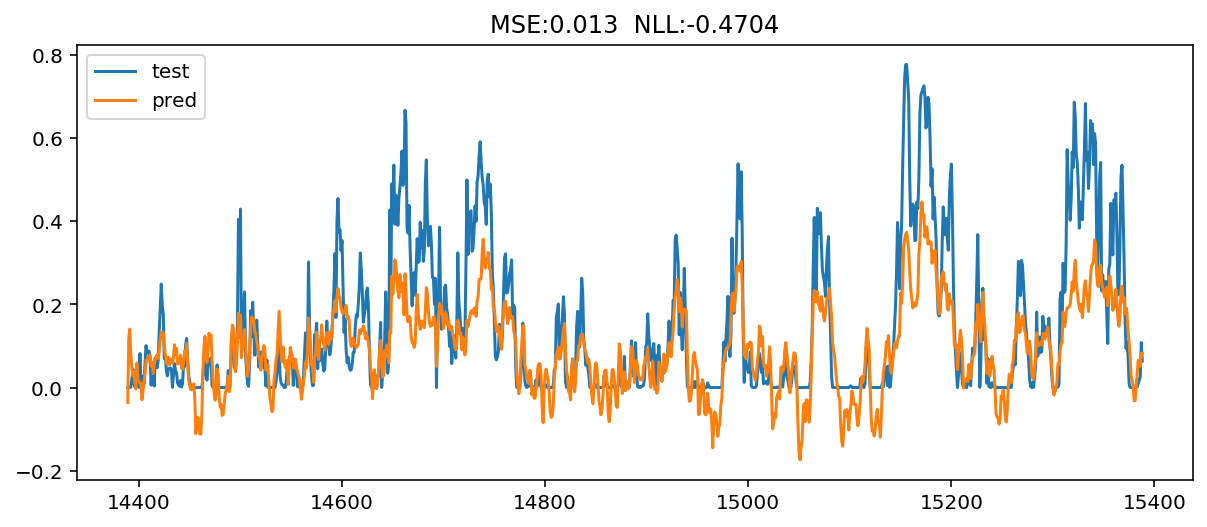

In [37]:
n_readout=464
n_components=30
damping = 0.61758485
weight_scaling = 0.94653868

model_test(Base= esn_ridge_learner(
                n_readout=n_readout,
                n_components=n_components,
                damping = damping,
                weight_scaling = weight_scaling,
                alpha=0.01),
            n_estimators=500, verbose_eval=100,
            X_train=X_train, X_test=X_test,
            Y_train=Y_train, Y_test=Y_test)

In [ ]:
n_readout=464
n_components=30
damping = 0.61758485
weight_scaling = 0.94653868

mse_list = []
for i in tqdm(range(10)):
    mse = model_test(Base= esn_ridge_learner(
                n_readout=n_readout,
                n_components=n_components,
                damping=damping,
                weight_scaling = weight_scaling,
                alpha=0.01),
            n_estimators=500, verbose=False,
            X_train=X_train, X_test=X_test,
            Y_train=Y_train, Y_test=Y_test,
            return_mse=True)
    mse_list.append(mse)

print('Test MSE:', np.mean(mse_list))